In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
complete_dataset = pd.read_csv('data.csv')

In [5]:
complete_dataset.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,42.351029,...,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues,NaN
1,blues.00001.wav,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,35.874684,...,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues,NaN
2,blues.00002.wav,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,31.689014,...,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues,NaN
3,blues.00003.wav,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,26.871927,...,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues,NaN
4,blues.00004.wav,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,22.153301,...,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues,NaN


In [6]:
complete_dataset.columns

Index(['filename', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label'],
      dtype='object')

In [7]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 28 columns):
filename              900 non-null object
chroma_stft           900 non-null float64
rmse                  900 non-null float64
spectral_centroid     900 non-null float64
spectral_bandwidth    900 non-null float64
rolloff               900 non-null float64
zero_crossing_rate    900 non-null float64
mfcc1                 900 non-null float64
mfcc2                 900 non-null float64
mfcc3                 900 non-null float64
mfcc4                 900 non-null float64
mfcc5                 900 non-null float64
mfcc6                 900 non-null float64
mfcc7                 900 non-null float64
mfcc8                 900 non-null float64
mfcc9                 900 non-null float64
mfcc10                900 non-null float64
mfcc11                900 non-null float64
mfcc12                900 non-null float64
mfcc13                900 non-null float64
mfcc14                900 non-null f

In [8]:
complete_dataset.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,label
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,0.0
mean,0.376561,2104.964251,2157.483742,4340.219268,0.100307,-152.992409,103.062620,-11.329449,38.512571,-2.381394,...,4.945062,-5.274102,2.068249,-4.243435,1.383696,-4.366523,0.505191,-2.681719,-1.250704,NaN
std,0.083756,662.093867,473.633765,1433.303782,0.041037,100.668846,30.345266,20.932820,15.786084,12.056703,...,6.816537,6.203939,5.048183,4.886735,4.616447,4.473466,3.908322,3.686042,3.902308,NaN
min,0.171782,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,-89.901142,-3.129031,-38.903451,...,-13.037723,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.719264,-18.504188,-19.935203,NaN
25%,0.311771,1555.607067,1852.510797,3235.222104,0.067779,-207.220059,80.854870,-25.593641,27.413955,-10.799223,...,-0.289262,-9.977822,-1.431840,-7.593141,-1.579751,-7.511142,-2.050637,-4.974190,-3.547371,NaN
50%,0.379650,2135.708370,2175.622742,4467.231321,0.095638,-127.642365,101.902440,-13.532371,39.068256,-1.738188,...,4.837039,-4.838156,2.254212,-4.223577,1.643030,-4.474579,0.660050,-2.757595,-1.311050,NaN
75%,0.435974,2567.551058,2440.575529,5315.840773,0.127830,-81.585730,122.685569,2.026750,49.334591,6.214877,...,10.161437,-0.864413,5.443571,-0.768238,4.580405,-1.302151,3.183598,-0.405041,1.219006,NaN
max,0.663573,4434.439444,3398.263214,8257.808399,0.274829,42.034587,193.096518,56.666090,80.691273,31.461661,...,23.037571,13.054333,18.161663,12.357588,13.468803,11.279266,15.379257,14.686910,15.368966,NaN


In [9]:
data_set = complete_dataset.drop(labels = ['mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20',], axis = 1)
corr = data_set.corr()
corr.style.background_gradient()
#We typically want to avoid using variables that 
#have strong correlations with each other, hence avoiding feature redundancy 
# but we do not see any 

C:\Users\damla\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,label
chroma_stft,1,0.651028,0.560155,0.64216,0.560599,0.670186,-0.613367,-0.0869028,0.327756,-0.0473126,nan
rmse,0.651028,1,0.88769,0.976978,0.875571,0.709702,-0.935257,0.0456037,0.0452292,-0.0712693,nan
spectral_centroid,0.560155,0.88769,1,0.946201,0.58443,0.626865,-0.895519,0.391367,-0.102772,0.182895,nan
spectral_bandwidth,0.64216,0.976978,0.946201,1,0.774194,0.712851,-0.933956,0.157085,0.0384257,-0.0216301,nan
rolloff,0.560599,0.875571,0.58443,0.774194,1,0.61649,-0.741431,-0.299542,0.123742,-0.307471,nan
zero_crossing_rate,0.670186,0.709702,0.626865,0.712851,0.61649,1,-0.611969,-0.209174,0.250445,-0.214916,nan
mfcc1,-0.613367,-0.935257,-0.895519,-0.933956,-0.741431,-0.611969,1,-0.174683,-0.107713,-0.056718,nan
mfcc2,-0.0869028,0.0456037,0.391367,0.157085,-0.299542,-0.209174,-0.174683,1,-0.345672,0.559215,nan
mfcc3,0.327756,0.0452292,-0.102772,0.0384257,0.123742,0.250445,-0.107713,-0.345672,1,-0.410182,nan
mfcc4,-0.0473126,-0.0712693,0.182895,-0.0216301,-0.307471,-0.214916,-0.056718,0.559215,-0.410182,1,nan


#However, since PCA uses the absolute variance of a feature to rotate the data, 
#a feature with a broader range of values will overpower and bias the algorithm 
#relative to the other features.
#To avoid this, we must first normalize our data. 
#There are a few methods to do this, but a common way is through standardization, 
#such that all features have a mean = 0 and standard deviation = 1

In [10]:
#firstly before applying pca, checking the data is so important
complete_dataset.isnull().sum() #checks if data has null values or not

filename                0
chroma_stft             0
rmse                    0
spectral_centroid       0
spectral_bandwidth      0
rolloff                 0
zero_crossing_rate      0
mfcc1                   0
mfcc2                   0
mfcc3                   0
mfcc4                   0
mfcc5                   0
mfcc6                   0
mfcc7                   0
mfcc8                   0
mfcc9                   0
mfcc10                  0
mfcc11                  0
mfcc12                  0
mfcc13                  0
mfcc14                  0
mfcc15                  0
mfcc16                  0
mfcc17                  0
mfcc18                  0
mfcc19                  0
mfcc20                  0
label                 900
dtype: int64

In [11]:
feature_dataset = complete_dataset.drop(['filename','label'],axis = 1) 
#dropping target columns and filename column
target = complete_dataset['label']


In [12]:
complete_dataset['label'].value_counts()

Series([], Name: label, dtype: int64)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaled_features = scaler.fit_transform(feature_dataset)
df = pd.DataFrame(scaled_features)

ValueError: could not convert string to float: 'blues'

In [16]:
final_dataset = pd.concat([df, complete_dataset['label']], axis = 1)
final_dataset = final_dataset.loc[(final_dataset.label != 'rock') & (final_dataset.label != 'disco')  
                                  & (final_dataset.label != 'jazz') ]

NameError: name 'df' is not defined

In [482]:
from sklearn.model_selection import train_test_split

In [483]:
X = final_dataset.drop(['label'],axis=1)
y = final_dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [484]:
from sklearn.decomposition import PCA

In [485]:
pca = PCA(.95)

In [486]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [487]:
pca.n_components_

15

Explained variance ratio : 
[0.32402566 0.25869513 0.10272864 0.06405594 0.03478199 0.03133013
 0.03014148 0.02069564 0.01680545 0.01429527 0.01320384 0.01177133
 0.01057305 0.00991103 0.00851818]


Number of components = 15


Text(0.5, 0, 'Principal Component #')

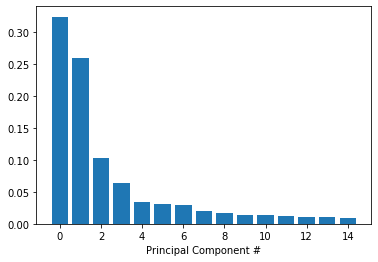

In [488]:
exp_variance = pca.explained_variance_ratio_

print("Explained variance ratio : \n{}".format(pca.explained_variance_ratio_))
print("\n")
print("Number of components = {}".format(pca.n_components_))  
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(15), exp_variance)
ax.set_xlabel('Principal Component #')

In [489]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [490]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [491]:
def knn(k, X_test, y_test, X_train, y_train):
    
    knn = KNeighborsClassifier(n_neighbors=k)  
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test) 

    print(classification_report(y_test, predictions))
    print('\n')
    print(confusion_matrix(y_test,predictions))
    print(" {} nn score: {} ".format(k,knn.score(X_test,y_test)))

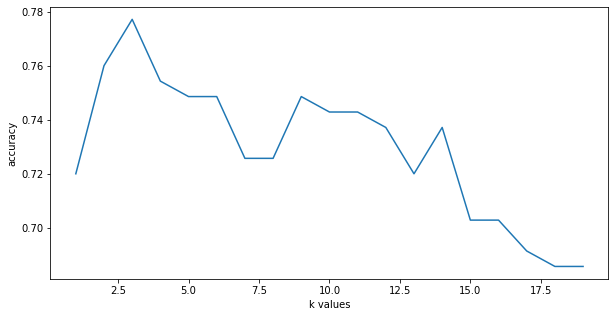

In [492]:
plt.figure(figsize = [10,5])
score_list = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,20),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [493]:
k = 3
knn(k, X_test, y_test, X_train, y_train)

              precision    recall  f1-score   support

       blues       0.83      0.81      0.82        31
   classical       0.78      0.96      0.86        26
     country       0.68      0.70      0.69        30
      hiphop       0.74      0.58      0.65        24
       metal       0.95      0.95      0.95        19
         pop       0.79      0.85      0.81        26
      reggae       0.69      0.58      0.63        19

    accuracy                           0.78       175
   macro avg       0.78      0.77      0.77       175
weighted avg       0.78      0.78      0.77       175



[[25  1  4  0  1  0  0]
 [ 0 25  0  0  0  1  0]
 [ 1  2 21  3  0  1  2]
 [ 3  1  1 14  0  2  3]
 [ 1  0  0  0 18  0  0]
 [ 0  1  1  2  0 22  0]
 [ 0  2  4  0  0  2 11]]
 3 nn score: 0.7771428571428571 


In [494]:
from sklearn.ensemble import RandomForestClassifier

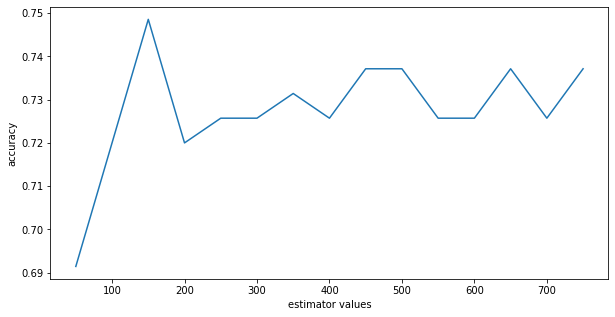

In [498]:
plt.figure(figsize = [10,5])
score_list = []
for i in range(50, 800, 50):
    rfc = RandomForestClassifier(n_estimators = i)
    rfc.fit(X_train,y_train)
    score_list.append(rfc.score(X_test,y_test))
    
plt.plot(range(50, 800, 50),score_list)
plt.xlabel("estimator values")
plt.ylabel("accuracy")
plt.show()


In [501]:
rfc = RandomForestClassifier(n_estimators=180)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [502]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("\n accuracy : {} ".format(rfc.score(X_test,y_test)))

              precision    recall  f1-score   support

       blues       0.81      0.71      0.76        31
   classical       0.96      0.88      0.92        26
     country       0.65      0.43      0.52        30
      hiphop       0.80      0.67      0.73        24
       metal       0.74      0.89      0.81        19
         pop       0.66      0.96      0.78        26
      reggae       0.57      0.68      0.62        19

    accuracy                           0.74       175
   macro avg       0.74      0.75      0.73       175
weighted avg       0.75      0.74      0.73       175

[[22  0  2  0  6  0  1]
 [ 0 23  2  0  0  1  0]
 [ 2  0 13  2  0  7  6]
 [ 1  0  2 16  0  2  3]
 [ 1  0  0  1 17  0  0]
 [ 0  0  0  1  0 25  0]
 [ 1  1  1  0  0  3 13]]

 accuracy : 0.7371428571428571 
